In [1]:
# Importing the Python libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank, inv
import sklearn.metrics as metrics
import math
%matplotlib inline

In [2]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)

    print('explained_variance: ', round(explained_variance, 4))    
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))
    print('mean_squared_log_error: ', round(mean_squared_log_error, 4))
    print('median_absolute_error: ', round(median_absolute_error, 4))

In [3]:
df = pd.read_csv("example1.txt", sep=" ")

In [5]:
df.head()

,y,x
0,681.91,48.48
1,666.83,47.49
2,657.71,47.33
3,602.31,42.27
4,641.55,47.13


In [6]:
df.describe()

,y,x
count,1.100000e+08,1.100000e+08
mean,6.396723e+02,4.545452e+01
std,3.789827e+01,2.462835e+00
min,4.650700e+02,3.395000e+01
25%,6.146000e+02,4.380000e+01
50%,6.356800e+02,4.525000e+01
75%,6.589900e+02,4.683000e+01
max,8.718700e+02,6.099000e+01


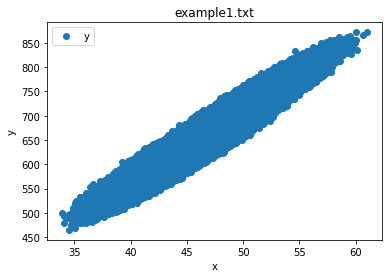

In [7]:
df.plot(x='x', y='y', style='o')
plt.title('example1.txt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x = df['x'].to_numpy().reshape((-1, 1))
y = df['y'].to_numpy()

In [9]:
model = LinearRegression().fit(x, y)

In [10]:
# coefficient of determination (𝑅²)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9214376422886941


In [11]:
# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
# You can notice that .intercept_ is a scalar, while .coef_ is an array.
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -31.74756121716905
slope: [14.77124576]


In [12]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[684.36243332 669.73890001 667.37550069 ... 711.83695044 677.1245229
 710.50753832]


In [13]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[684.36243332]
 [669.73890001]
 [667.37550069]
 ...
 [711.83695044]
 [677.1245229 ]
 [710.50753832]]


In [14]:
print('y:', y, y.shape)
print('y_pred:', y_pred, y_pred.shape)

y: [681.91 666.83 657.71 ... 726.61 682.3  724.07] (110000000,)
y_pred: [[684.36243332]
 [669.73890001]
 [667.37550069]
 ...
 [711.83695044]
 [677.1245229 ]
 [710.50753832]] (110000000, 1)


In [15]:
r = y_pred.reshape(-1) - y
print('r:', r)

r: [  2.45243332   2.90890001   9.66550069 ... -14.77304956  -5.1754771
 -13.56246168]


In [16]:
n = len(df)
m = matrix_rank(x)
variance_pow2 = sum(r ** 2) / (n - m)
variance = math.sqrt(variance_pow2)
print('(n, m, variance_pow2, variance):', n, m, variance_pow2, variance)

(n, m, variance_pow2, variance): 110000000 1 112.83745877469549 10.622497765341986


In [17]:
# standard_error = math.sqrt(np.diag(variance_pow2 * inv(np.transpose(x) * x)))

In [18]:
regression_results(y, y_pred.reshape(-1))

explained_variance:  0.9214
r2:  0.9214
MAE:  8.4656
MSE:  112.8375
RMSE:  10.6225
mean_squared_log_error:  0.0003
median_absolute_error:  7.1433


In [19]:
from statsmodels.api import OLS
OLS(y, y_pred.reshape(-1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.002e+11
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:51:25   Log-Likelihood:                     -4.1601e+08
No. Observations:           110000000   AIC:                                  8.320e+08
Df Residuals:               109999999   BIC:                                  8.320e+08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.58e-06   6.33e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                    55895.835   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56058.017
Skew:                           0.054   Prob(JB):                         0.00
Kurtosis:                       3.027   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

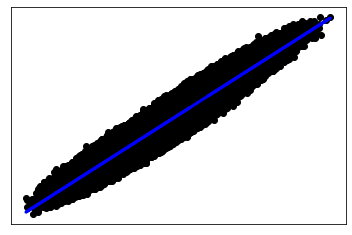

In [20]:
# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [10]:
import time
for i in range(1100000, 1100001):
    start_time = time.time()
    div = math.ceil(len(df) / i)
    x_all = []
    y_all = []
    xtx = 0
    xty = 0
    chucks = 0
    time_dict = {}
    for j in range(0, len(df), div):
        minidx = min(len(df), j + div)
        x_div = df['x'][j:minidx].to_numpy().reshape((-1, 1))
        y_div = df['y'][j:minidx].to_numpy()
        x_all.append(x_div)
        y_all.append(y_div)
        xtx += np.transpose(x_div) @ x_div
        xty += np.transpose(x_div) @ y_div
        chucks += 1
    
    xtx_inv = inv(xtx)
    beta = xtx_inv * xty
    
    y_all_pred = []
    r_all = []
    rss_div = 0
    for idx in range(len(x_all)):
        y_div_pred = x_all[idx] * beta
        y_all_pred.append(y_div_pred)
        
        r_div = y_all[idx] - y_div_pred
        r_all.append(r_div)
        rss_div += np.transpose(r_div) * r_div

    n = len(df)
    m = matrix_rank(df['x'])
    variance_pow2_div = np.sum(np.power(np.array(r_all), 2)) / (n - m)
    variance_div = math.sqrt(variance_pow2_div)
    standard_error = math.sqrt(np.diag(variance_pow2_div * xtx_inv))
        
    print("--- i = {0}, {1} seconds ---".format(i, time.time() - start_time))
    print("beta:", beta)
    print('(n, m, variance_pow2_div, variance_div):', n, m, variance_pow2_div, variance_div)
    print('standard_error:', standard_error)


beta: [[14.07484346]]
--- i = 11000000, 1456.7633159160614 seconds ---
(n, m, variance_pow2_div, variance_div): 110000000 1 15065.375311936641 122.74109056031986
standard_error: 0.00025708693908823324


In [ ]:
import time
# print(len(df)) # 110000000

start_time = time.time()
x_all = []
y_all = []
xtx = 0
xty = 0
chucks = 0
for j in range(0, 11000000, 100):
    minidx = j + 100
    x_div = df['x'][j:minidx].to_numpy().reshape((-1, 1))
    y_div = df['y'][j:minidx].to_numpy()
    x_all.append(x_div)
    y_all.append(y_div)
    xtx += np.transpose(x_div) @ x_div
    xty += np.transpose(x_div) @ y_div
    chucks += 1

xtx_inv = inv(xtx)
beta = inv(xtx) * xty

y_all_pred = []
r_all = []
rss_div = 0
for idx in range(len(x_all)):
    y_div_pred = x_all[idx] * beta
    y_all_pred.append(y_div_pred)

    r_div = y_all[idx] - y_div_pred
    r_all.append(r_div)
    rss_div += np.transpose(r_div) * r_div

n = len(df)
m = matrix_rank(df['x'])
variance_pow2_div = np.sum(np.power(np.array(r_all), 2)) / (n - m)
variance_div = math.sqrt(variance_pow2_div)
standard_error = math.sqrt(np.diag(variance_pow2_div * xtx_inv))

print("--- i = {0}, {1} seconds ---".format(i, time.time() - start_time))
print("beta:", beta)
print('(n, m, variance_pow2_div, variance_div):', n, m, variance_pow2_div, variance_div)
print('standard_error:', standard_error)
